# k-Means
## This notebook outlines the some example datasets that you could solve using k-means 

This k-Means comes into a category of **clustering algorithms**.

Clustering algorithms seek to learn, from the properties of the data, an optimal division or discrete labeling of groups of points.

In [9]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np

### Digits Clustering
Try to cluster digits from 0 to 9 without their labels

Data loading step
- Load the dataset from sklearn.datasets
- Split them into X and y
- Use only X for this problem and discard the y

Four steps
- Import the KMeans Estimator
- Create the KMeans estimator object
- Fit the model
- Predict

### Load the dataset

In [1]:
from sklearn.datasets import load_digits

### Split the datasets into X

In [3]:
digits = load_digits()
X = digits.data
X.shape

(1797, 64)

### Import the KMeans Estimator

In [4]:
from sklearn.cluster import KMeans

### Create the KMeans model specifying the number of clusters to make

In [5]:
kmeans = KMeans(n_clusters=10, random_state=0)

### Fit the model

In [6]:
kmeans.fit(X)

KMeans(n_clusters=10, random_state=0)

### Find how many cluster centres

In [18]:
kmeans.cluster_centers_.shape[0]

10

### Predict

In [7]:
clusters = kmeans.predict(X)

Let's visualize the results by plotting the data colored by these labels.
Also plot the cluster centers as determined by the *k*-means estimator

### Plot some cluster samples

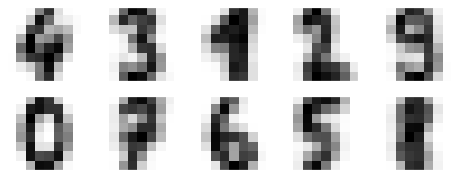

In [10]:
fig, ax = plt.subplots(2, 5, figsize=(8, 3))
centers = kmeans.cluster_centers_.reshape(10, 8, 8)
for axi, center in zip(ax.flat, centers):
    axi.set(xticks=[], yticks=[])
    axi.imshow(center, interpolation='nearest', cmap=plt.cm.binary)

In [12]:
from scipy.stats import mode

labels = np.zeros_like(clusters)
for i in range(10):
    mask = (clusters == i)
    labels[mask] = mode(digits.target[mask])[0]

### Accuracy

In [13]:
from sklearn.metrics import accuracy_score
accuracy_score(digits.target, labels)

0.7952142459654981

### Confusion Matrix

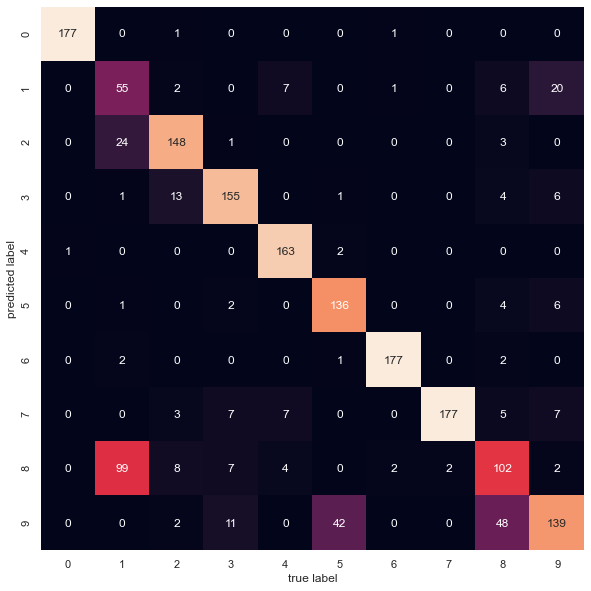

In [16]:
from sklearn.metrics import confusion_matrix
plt.figure(figsize=(10,10))
mat = confusion_matrix(digits.target, labels)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=digits.target_names,
            yticklabels=digits.target_names)

plt.xlabel('true label')
plt.ylabel('predicted label');

### What issues / insights you see from the Confusion Matrix???